In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Automobile_data.csv')

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

# **Data Cleaning**

In [9]:
# Replace '?' with null values
df.replace('?', np.nan, inplace=True)

In [10]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [11]:
# Replace missing values in 'normalized-losses' with the column mean after converting to float
df['normalized-losses'] = df['normalized-losses'].astype(float)
df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)

# Replace missing values in 'num-of-doors' with the most frequent value (mode)
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

# Replace missing values in 'horsepower' with the column mean after converting to float
df['horsepower'] = df['horsepower'].astype(float)
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

# Replace missing values in 'stroke' with the rounded column mean after converting to float
df['stroke'] = df['stroke'].astype(float)
df['stroke'].fillna(round(df['stroke'].mean(), 2), inplace=True)

# Replace missing values in 'bore' with the rounded column mean after converting to float
df['bore'] = df['bore'].astype(float)
df['bore'].fillna(round(df['bore'].mean(), 2), inplace=True)

# Replace missing values in 'peak-rpm' with with the most frequent value (mode) after converting to float
df['peak-rpm'] = df['peak-rpm'].astype(float)
df['peak-rpm'].fillna(df['peak-rpm'].mode()[0], inplace=True)

In [12]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [15]:
# Convert selected columns to float type to ensure numerical consistency for analysis and modeling
df[['bore', 'stroke', 'horsepower', 'peak-rpm', 'price', 'normalized-losses']] = \
df[['bore', 'stroke', 'horsepower', 'peak-rpm', 'price', 'normalized-losses']].astype(float)

In [16]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [17]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330697,3.256965,10.164279,103.405534,5121.393035,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,479.624905,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


# **EDA**

In [18]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

In [20]:
# Select categorical columns 
cat_cols = df.select_dtypes(include=['object'])

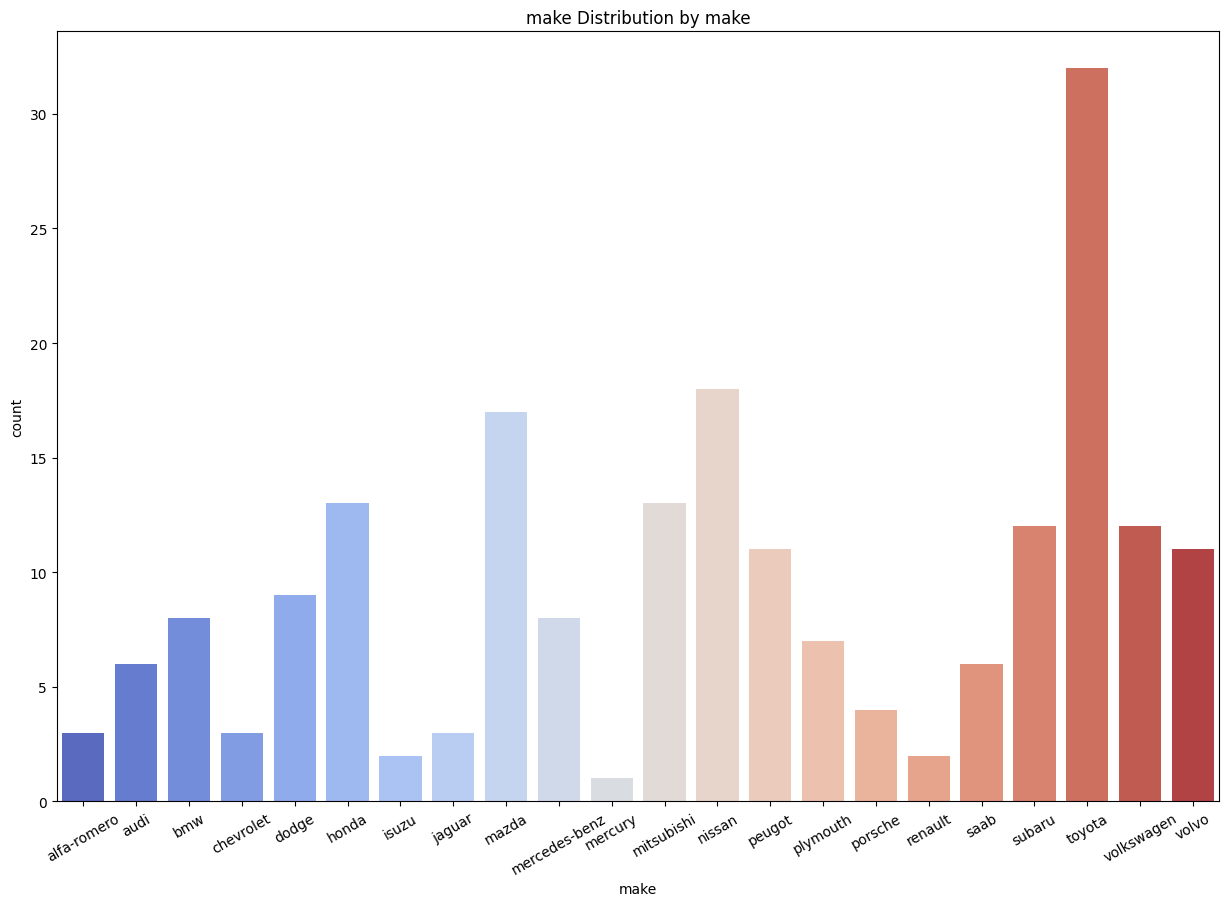

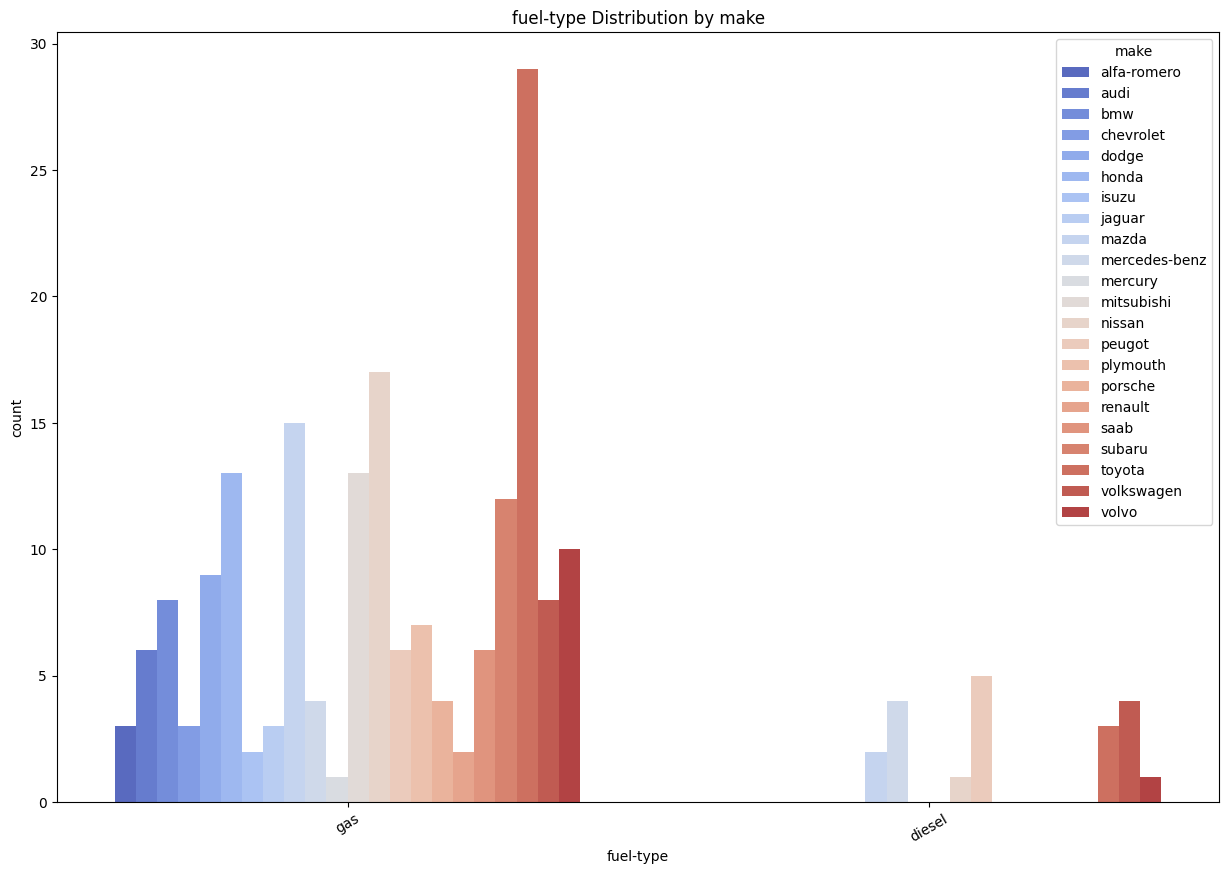

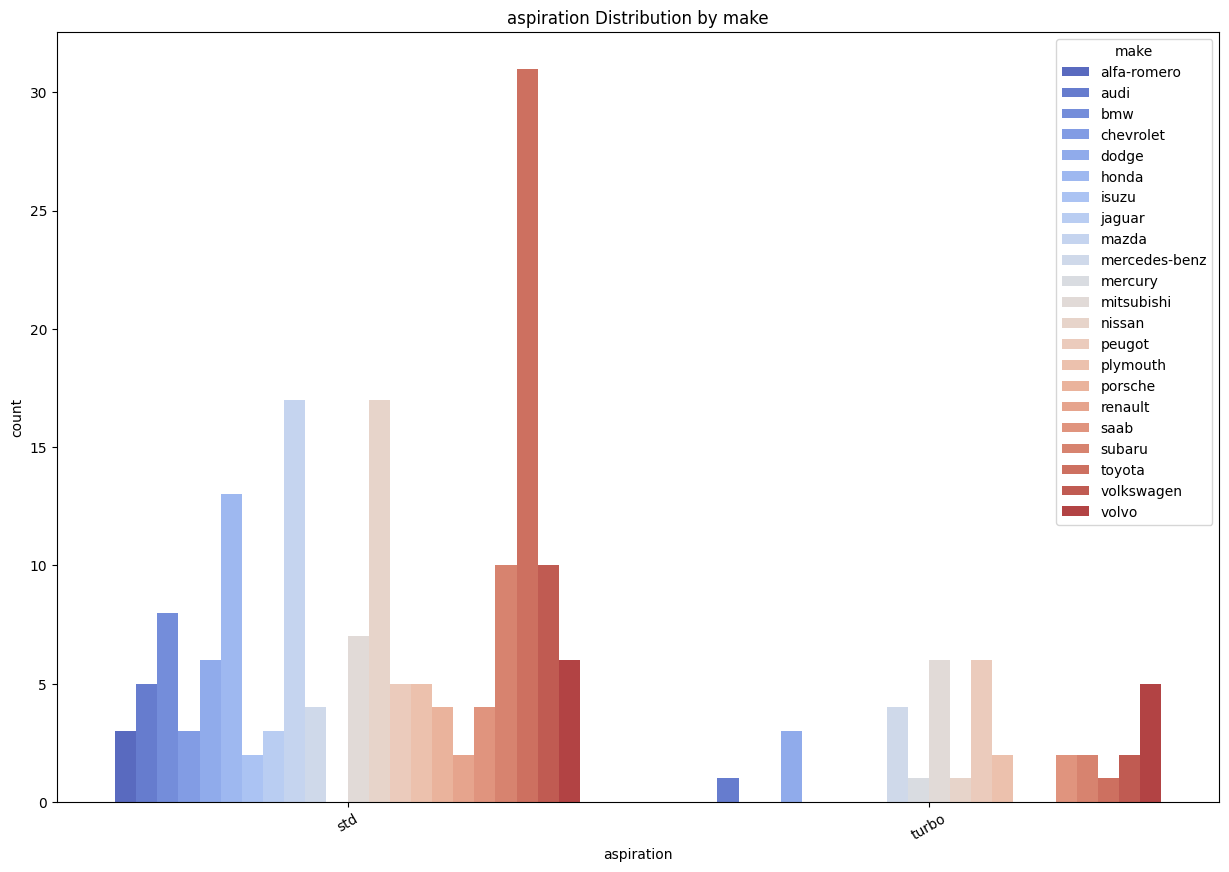

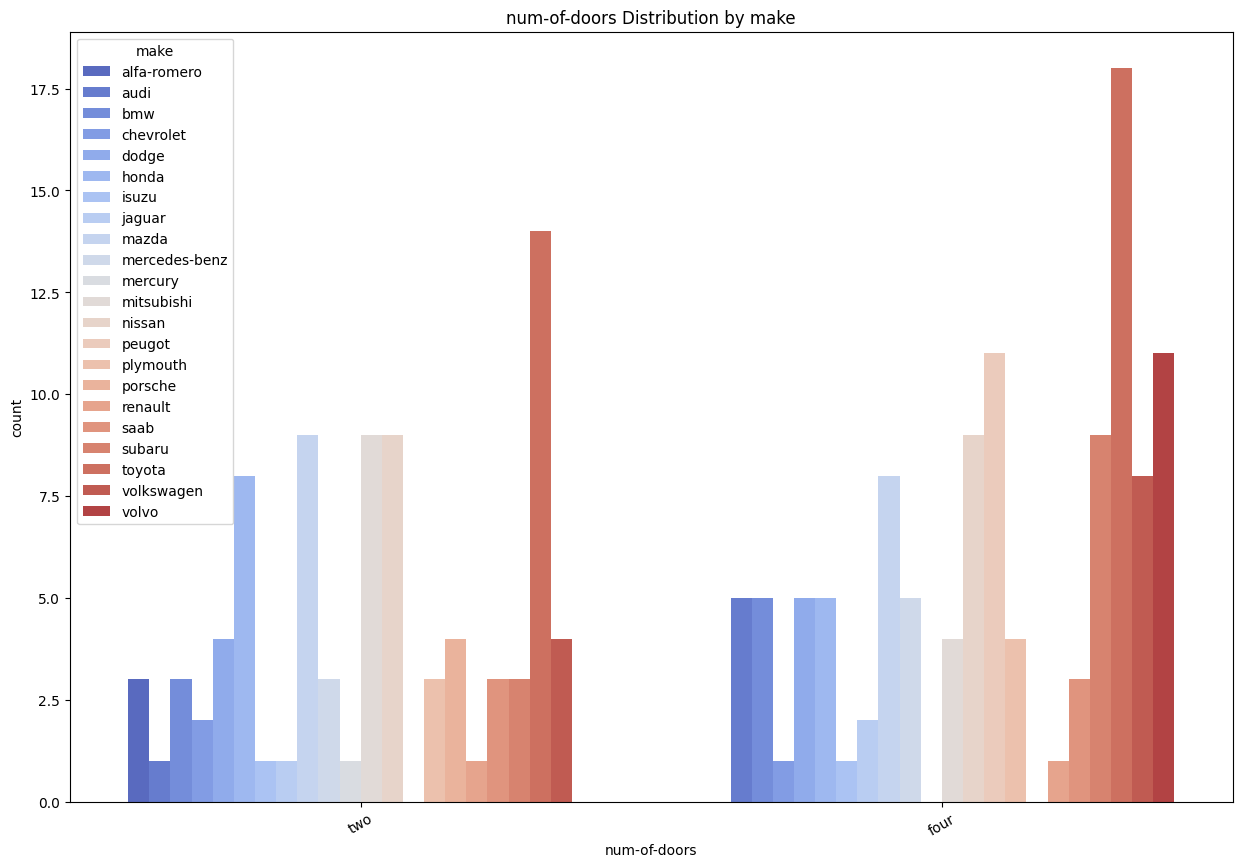

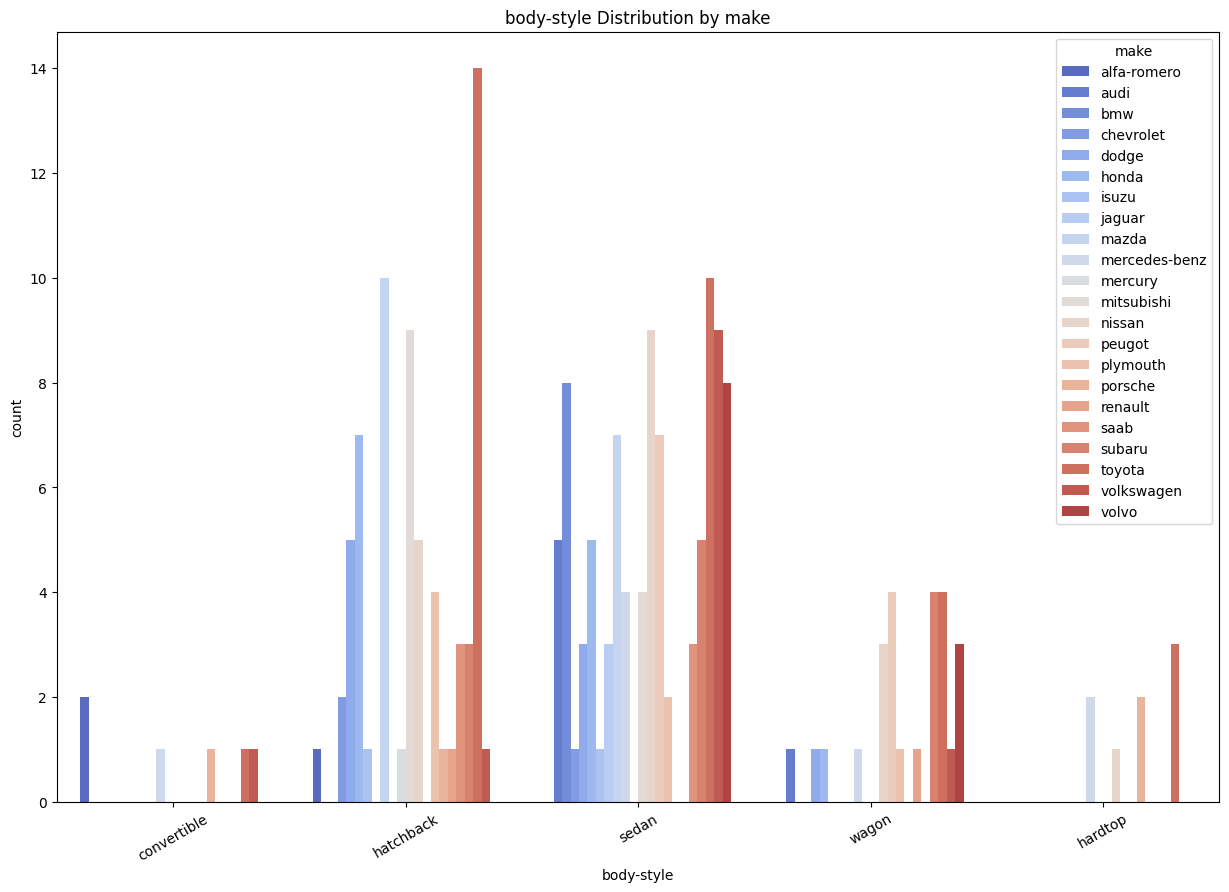

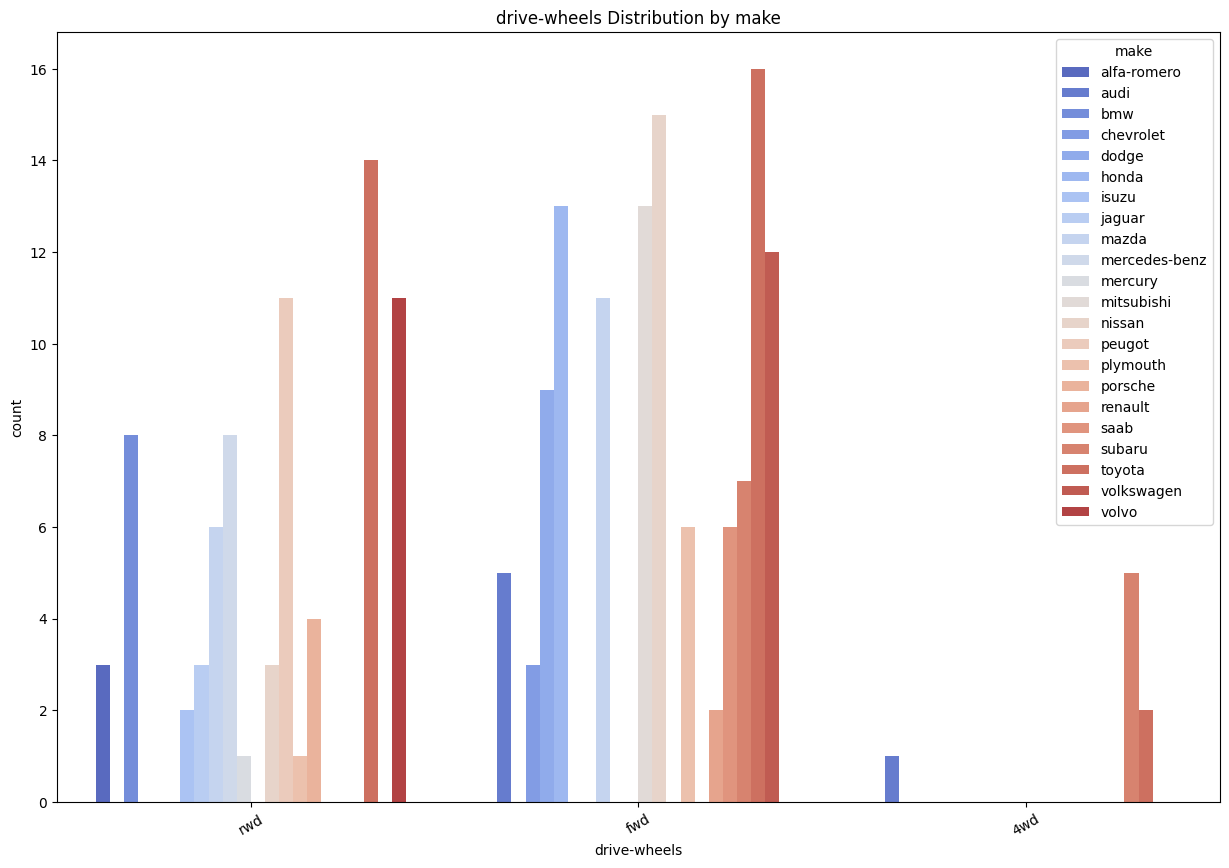

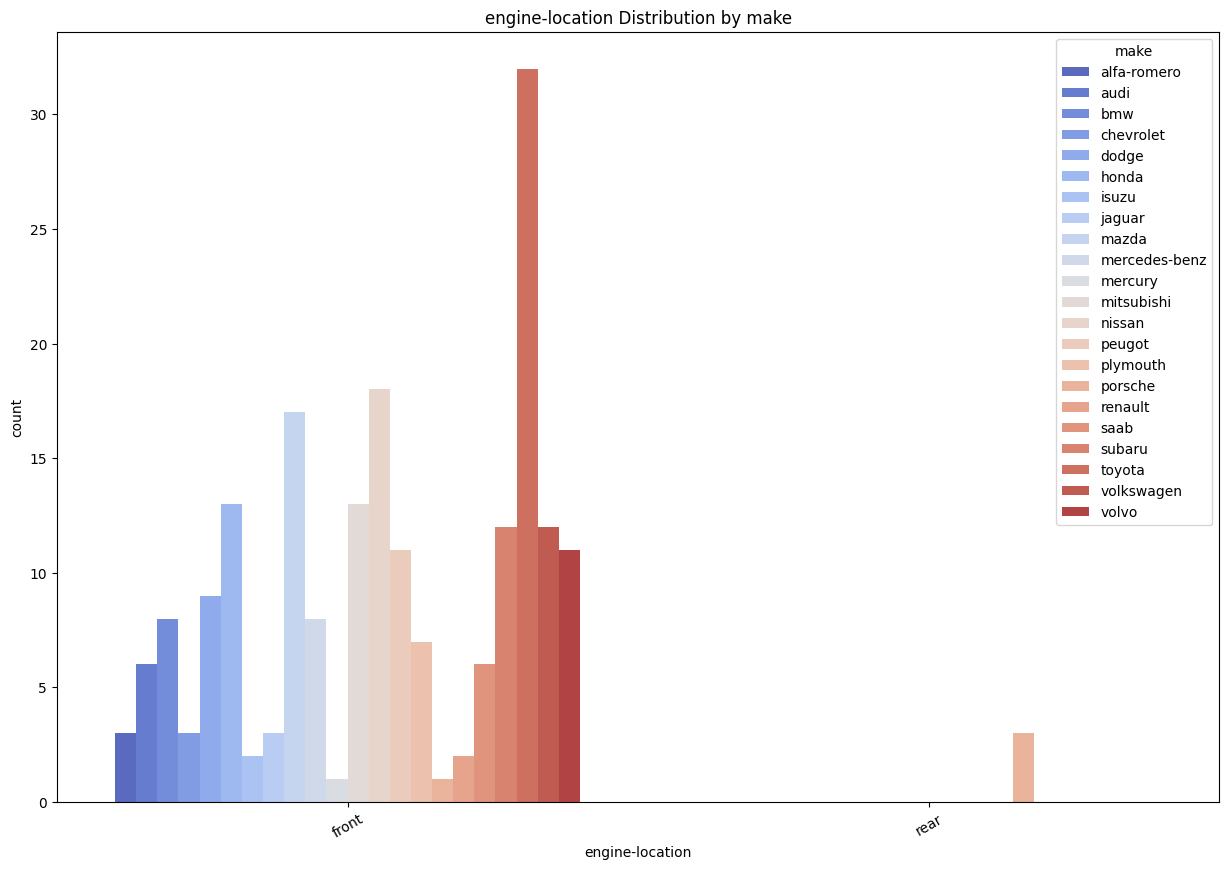

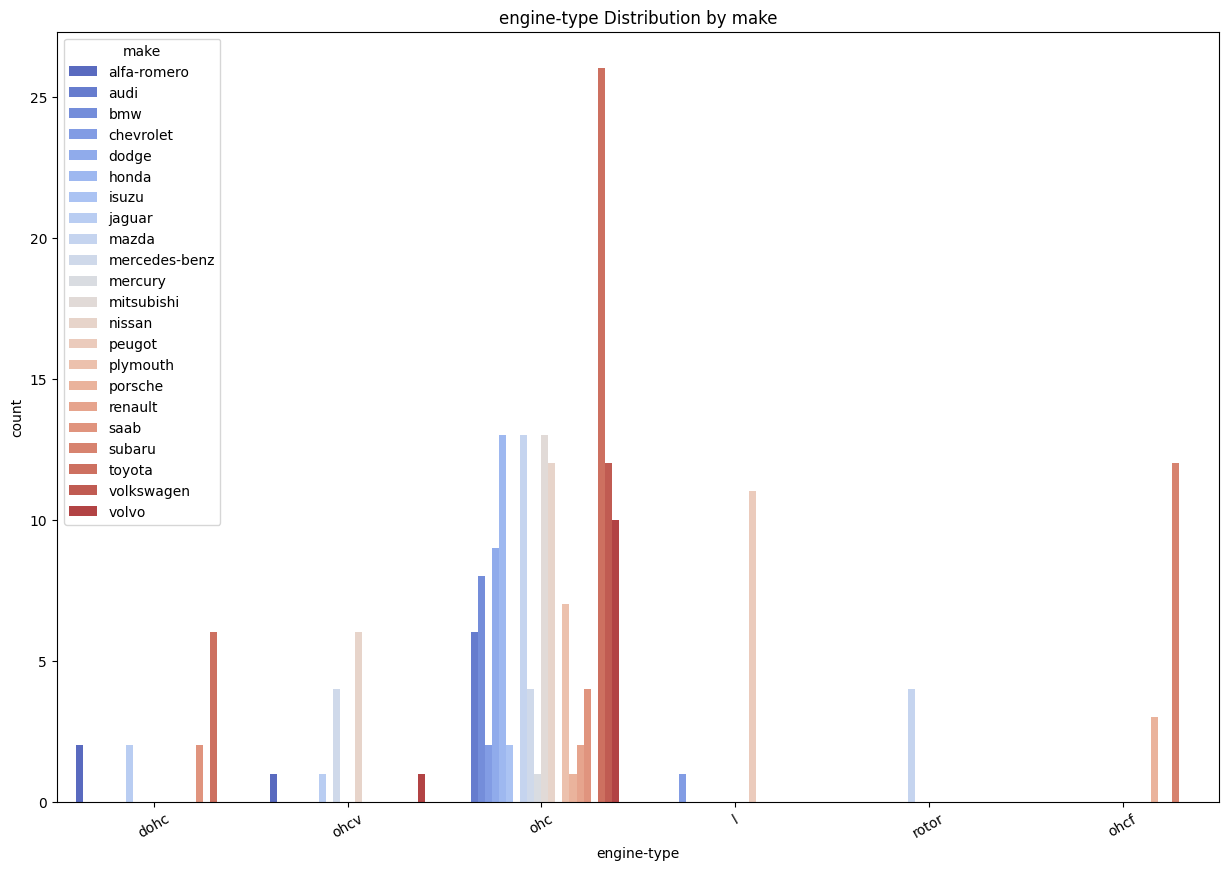

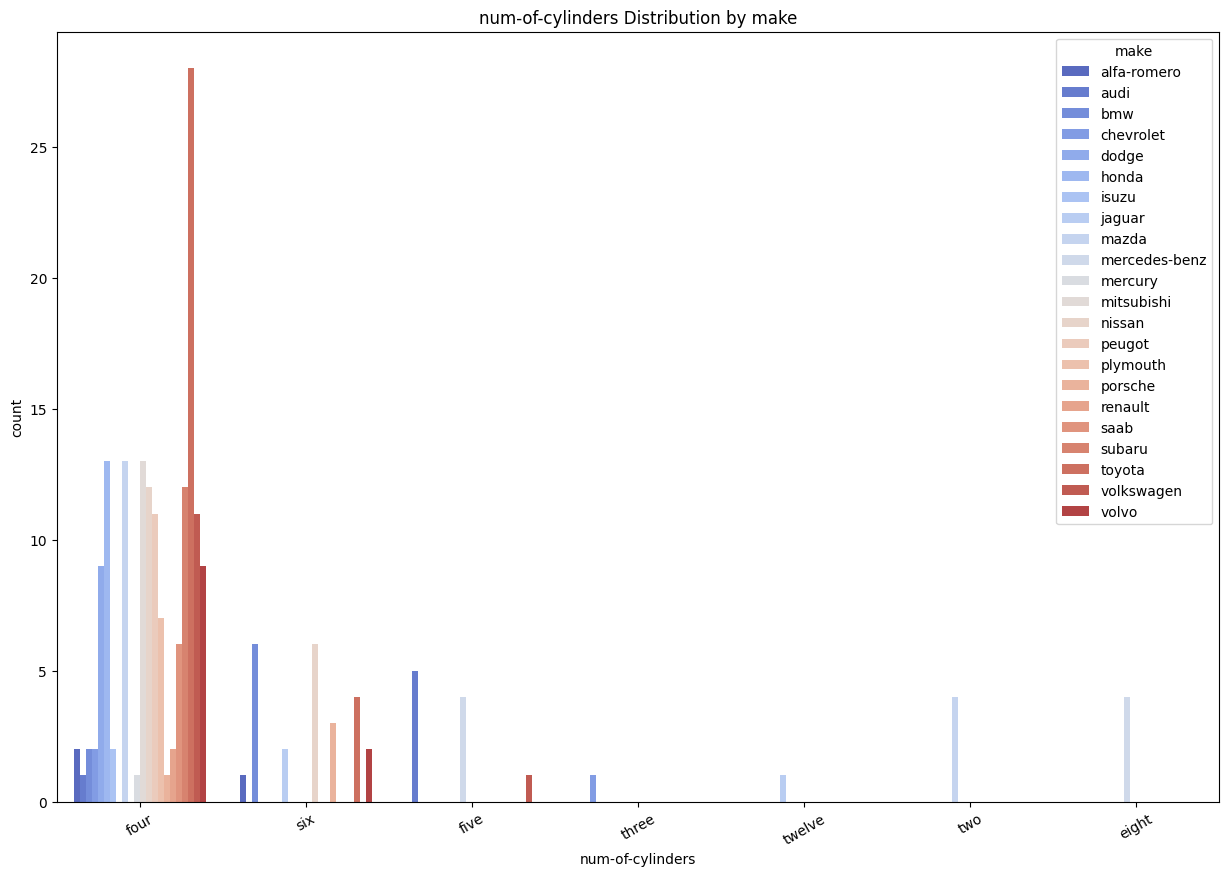

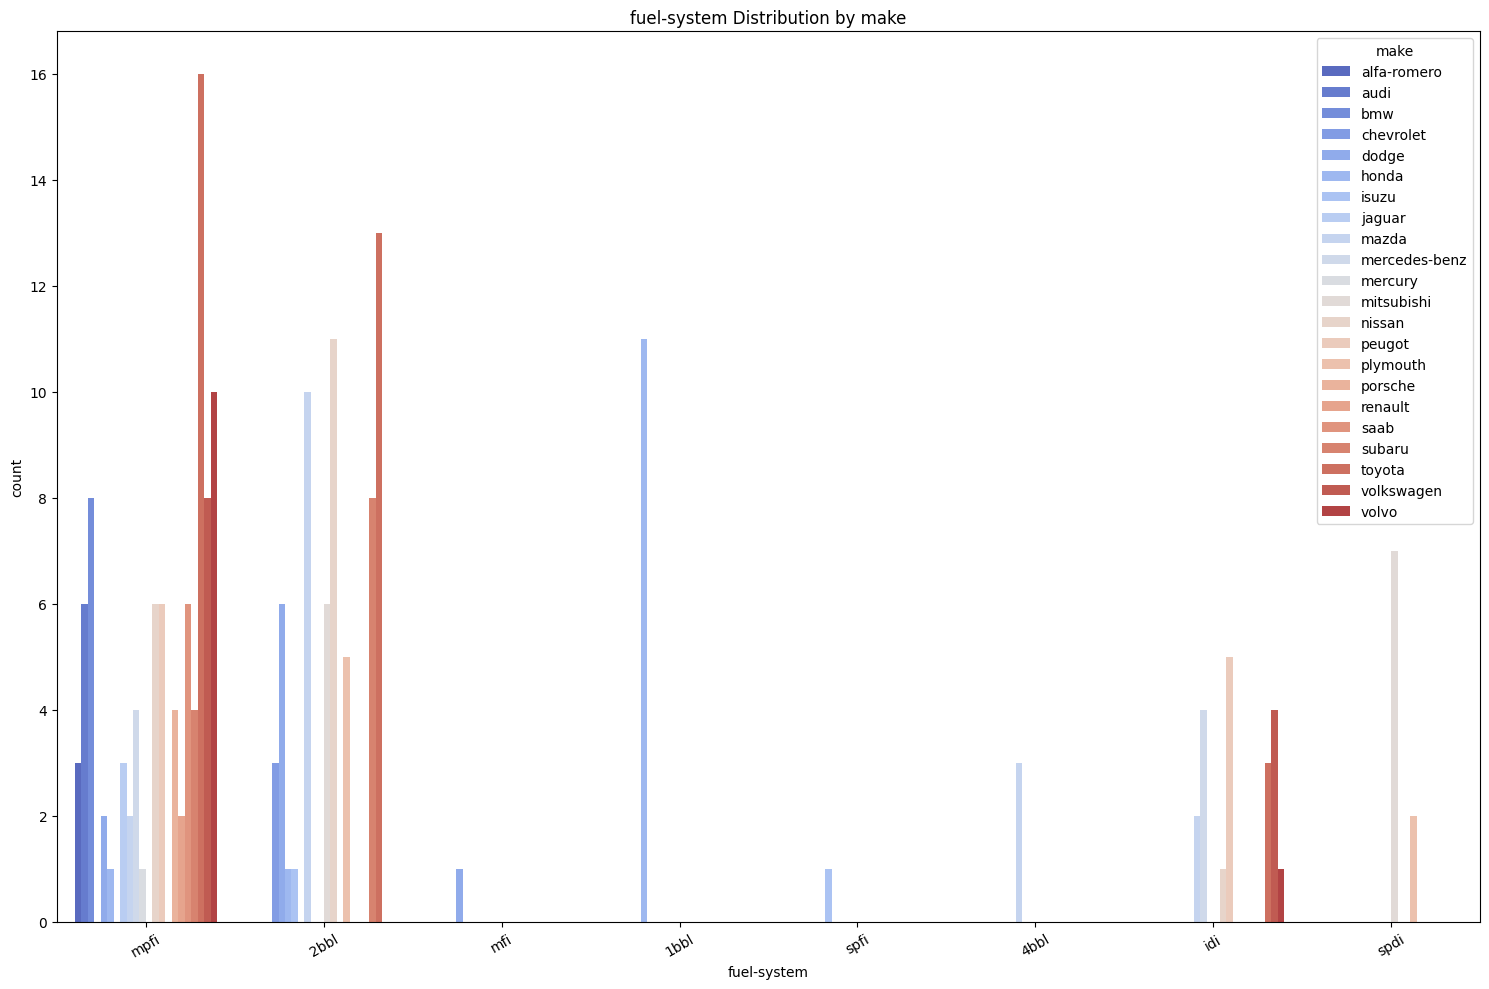

In [21]:
# Categorical columns distribution
for col in cat_cols:
    plt.figure(figsize=(15, 10))
    sns.countplot(data=df, x=col, palette='coolwarm', hue='make')
    plt.title(f'{col} Distribution by make')
    plt.xticks(rotation=30)
    
plt.tight_layout()

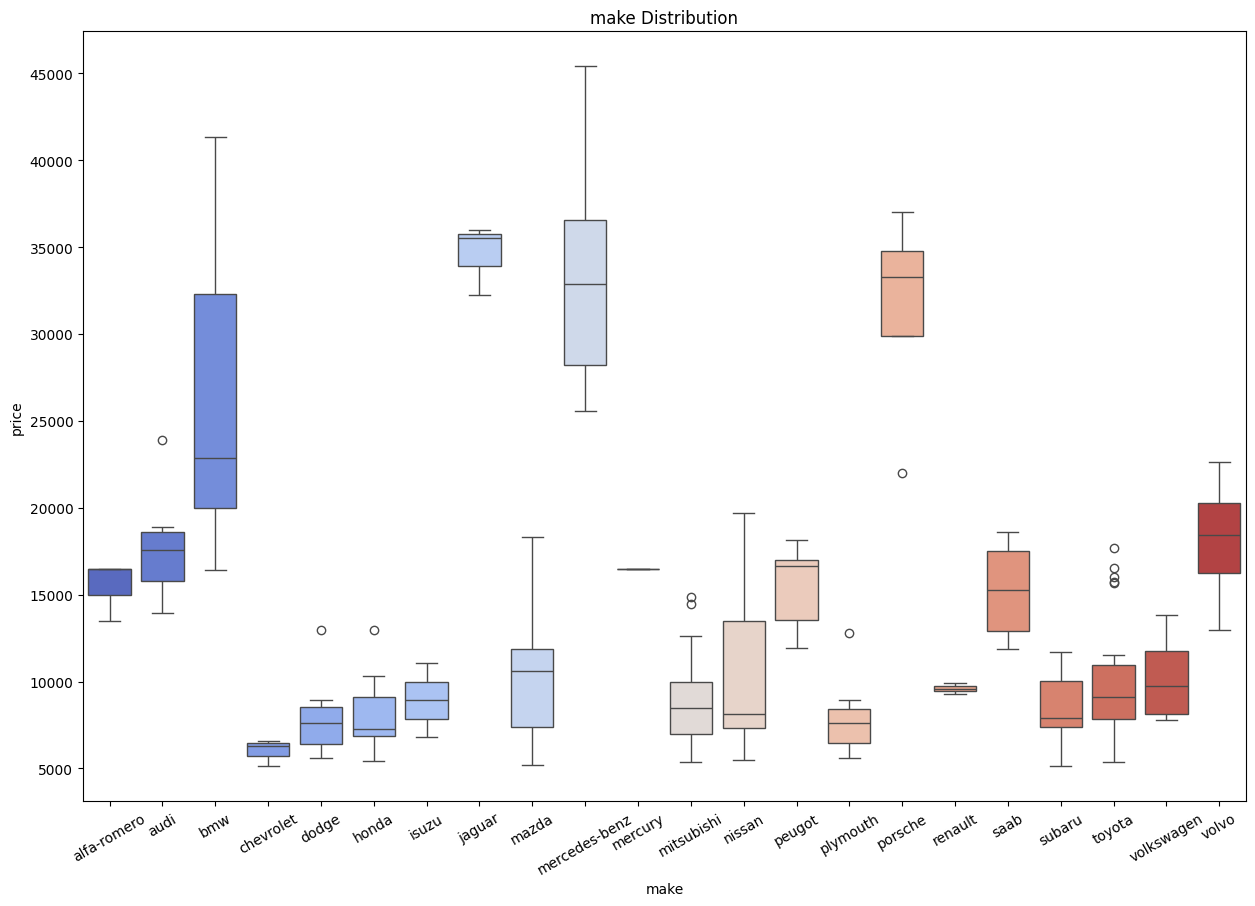

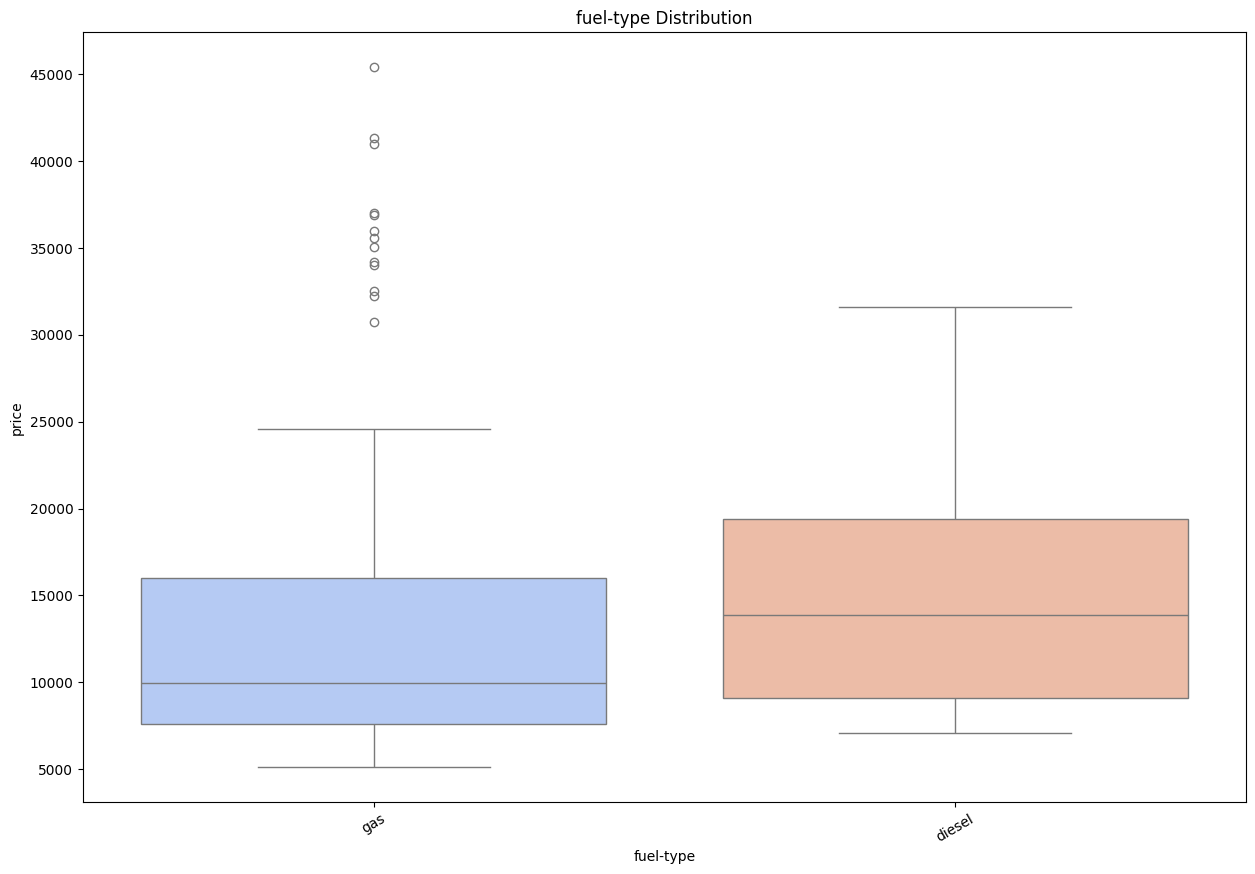

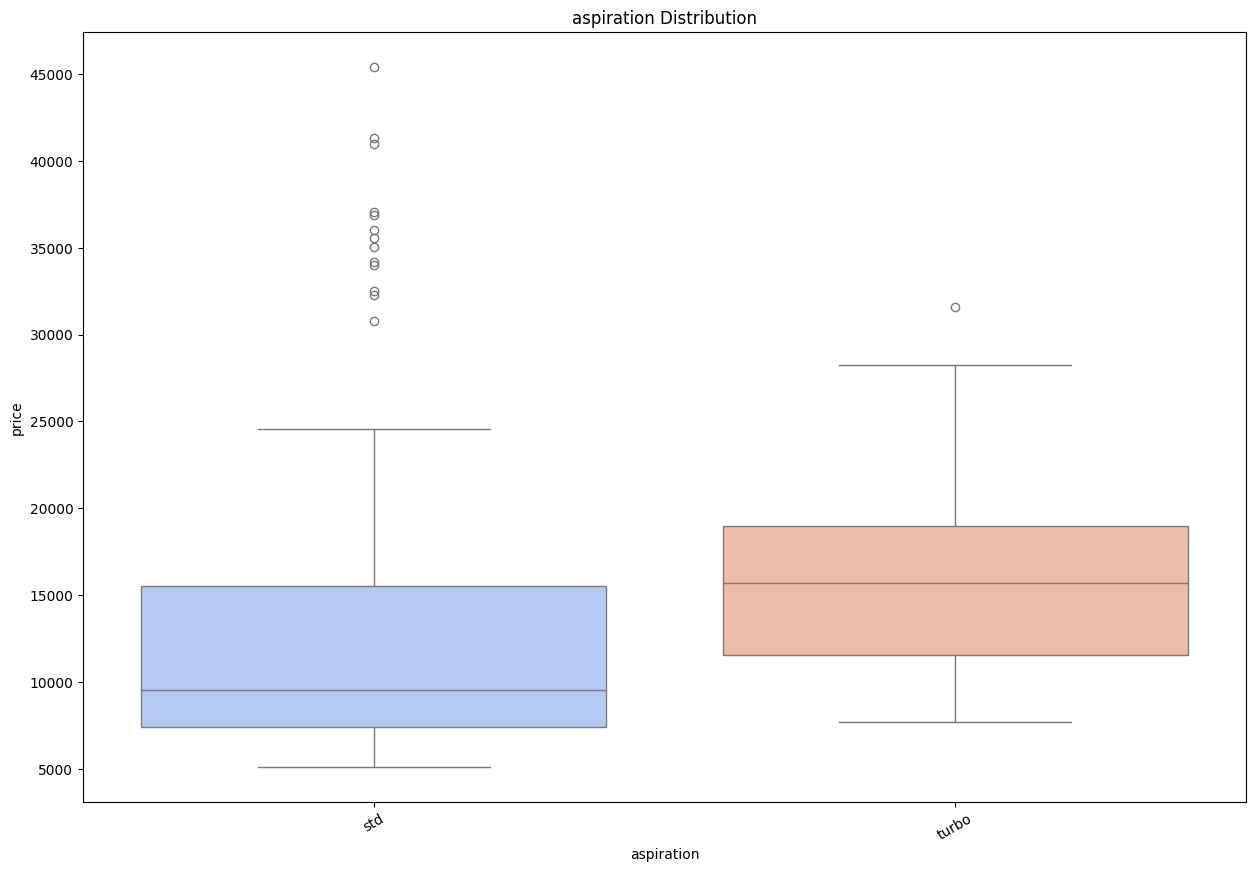

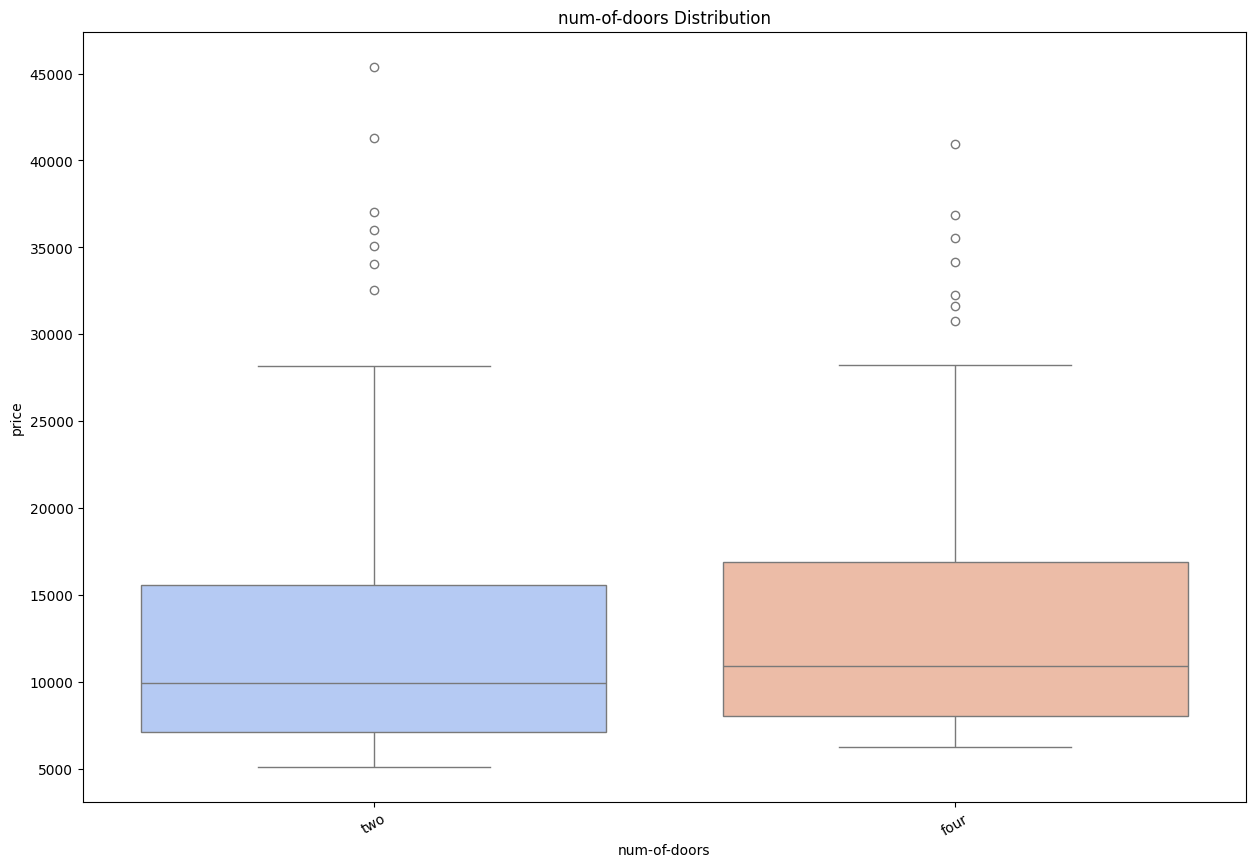

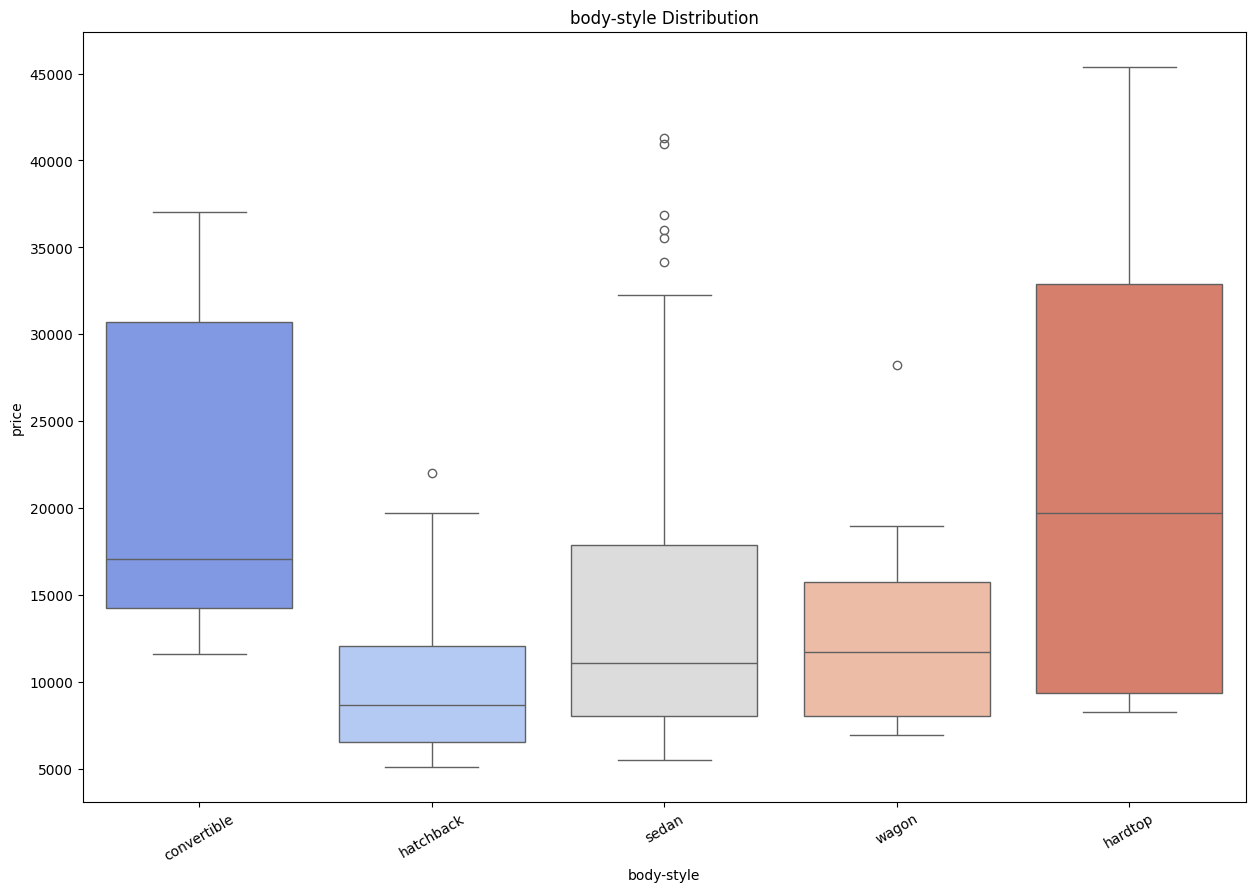

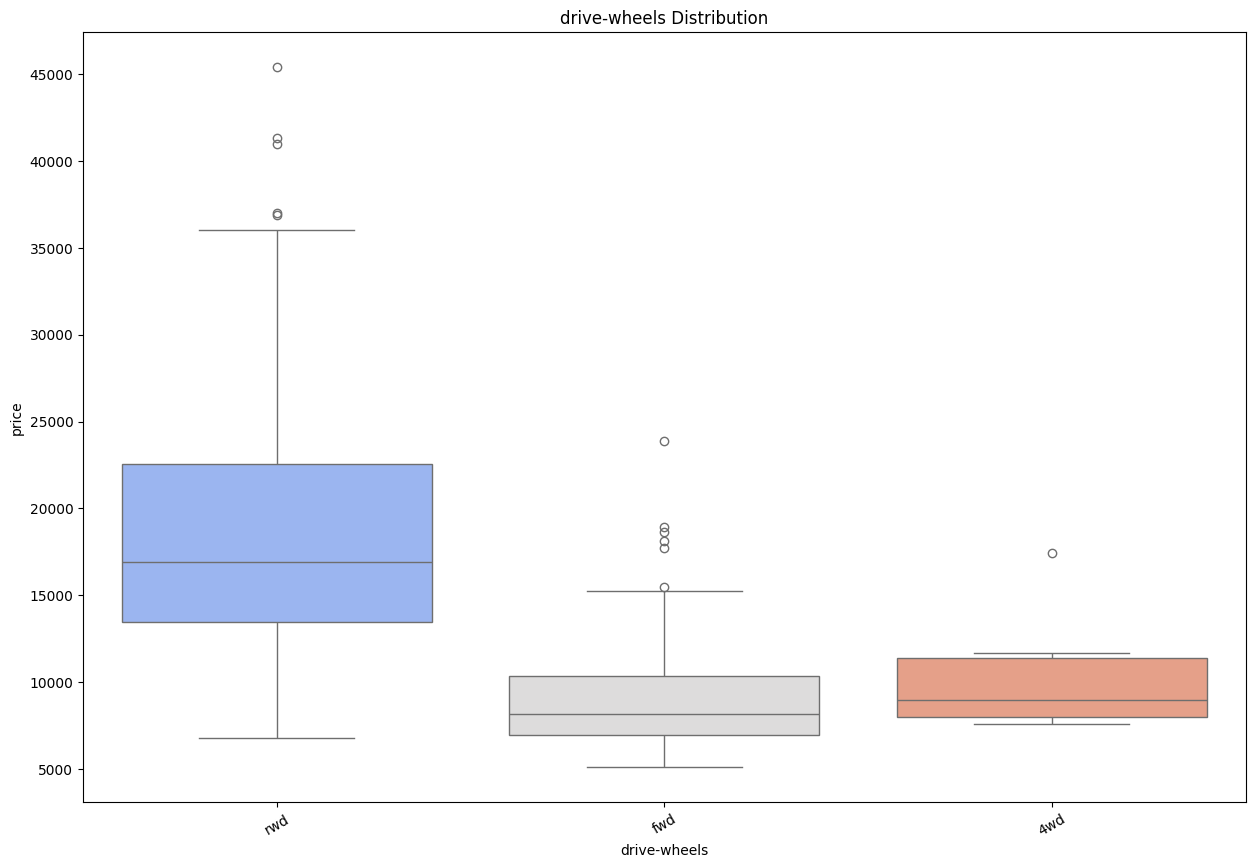

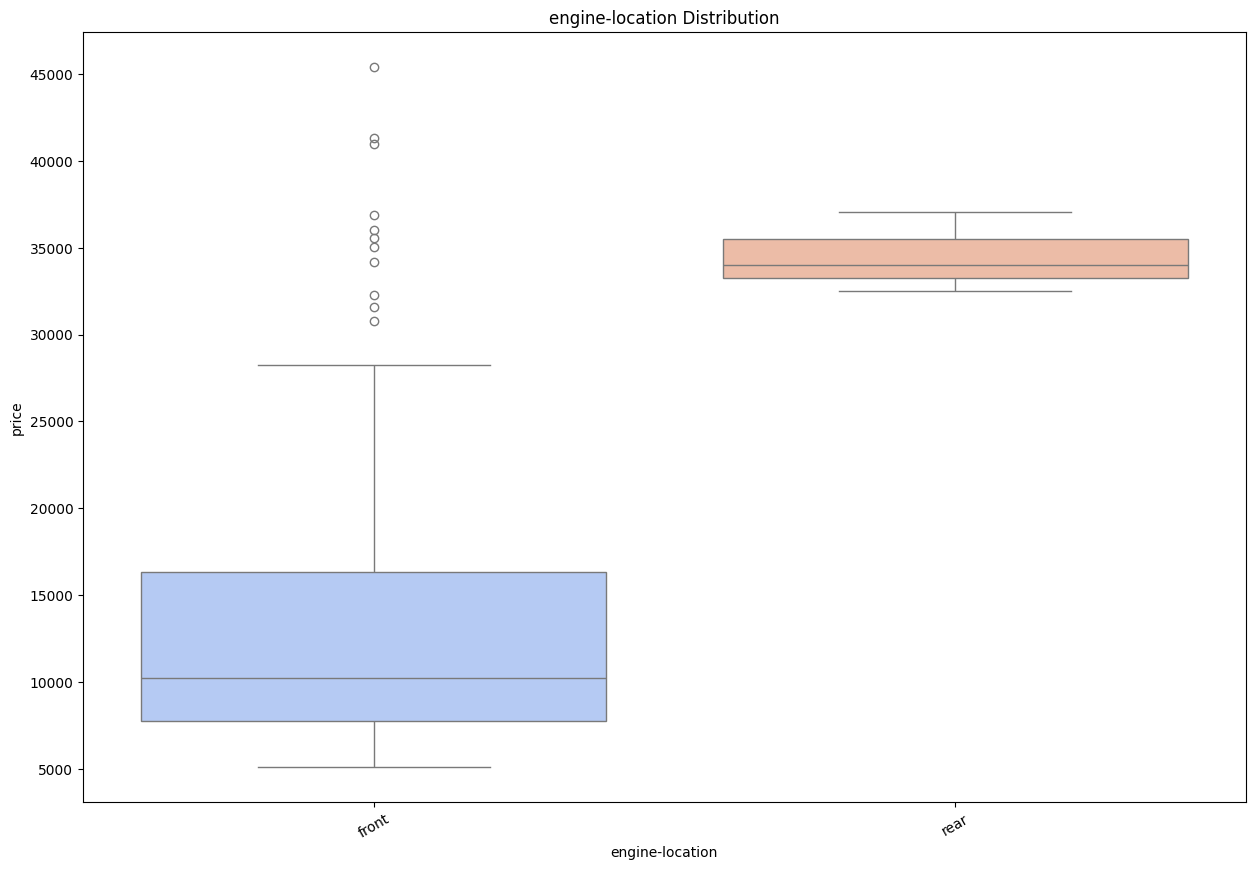

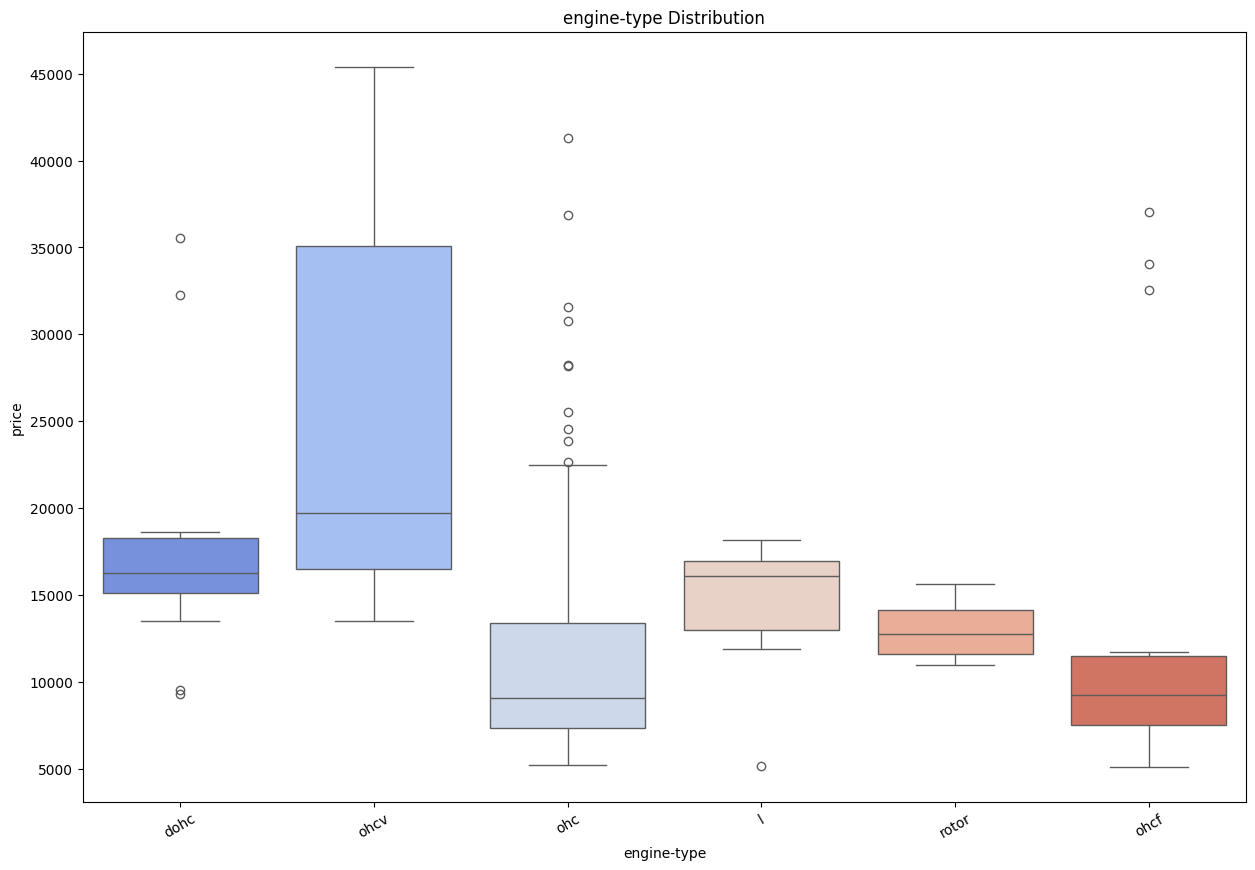

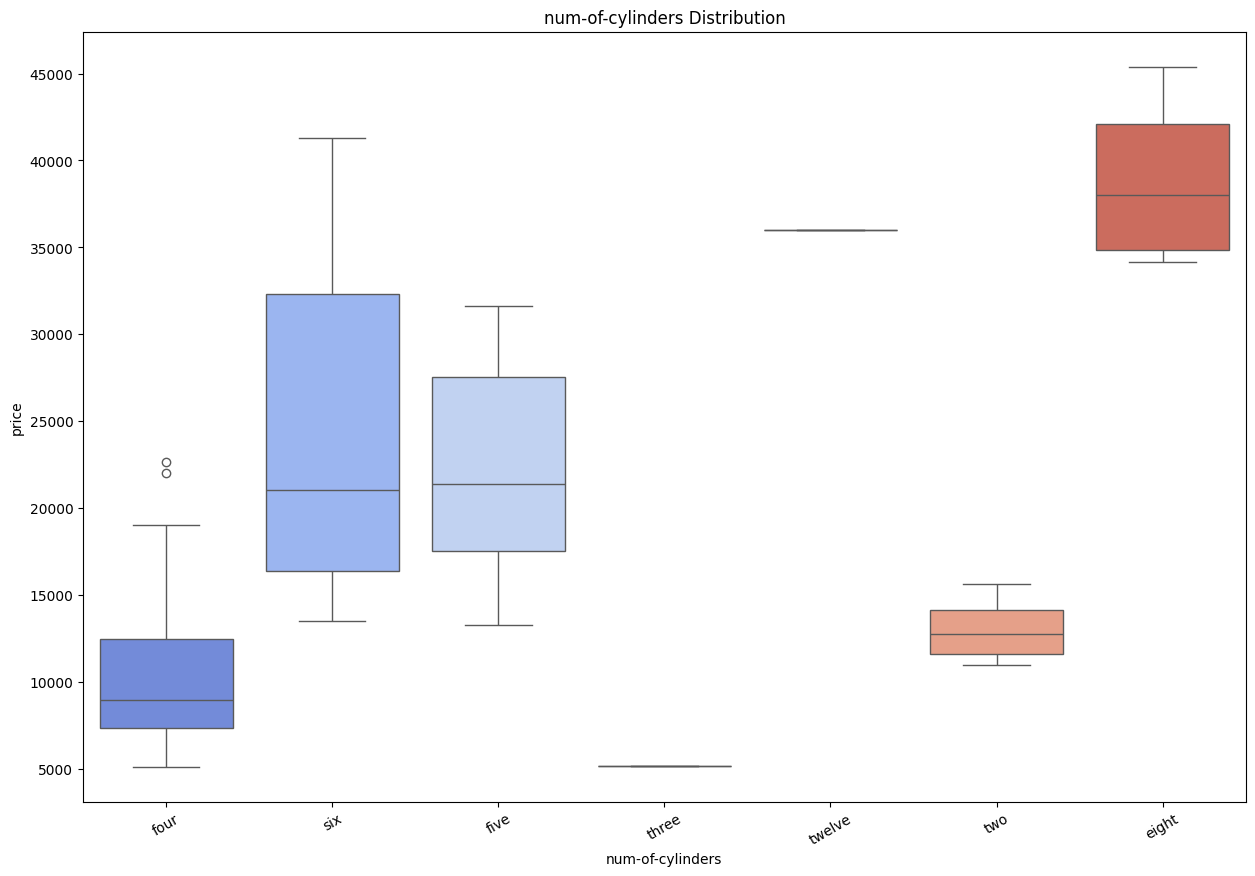

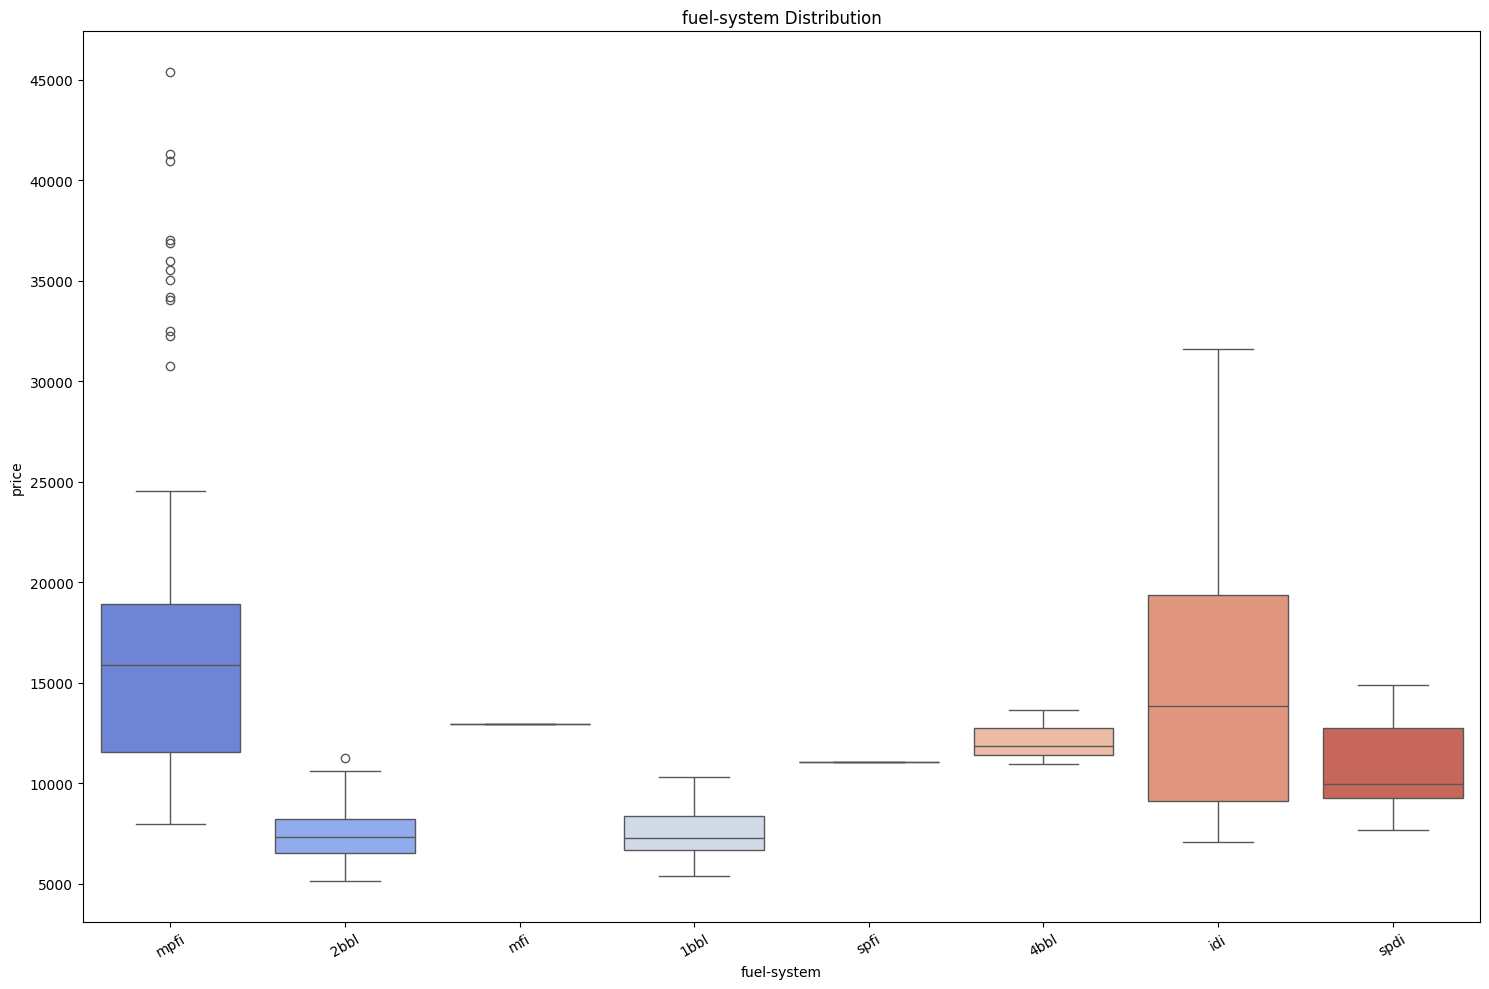

In [22]:
# Barplot visualization by category
for col in cat_cols:
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df, x=col, y='price', palette='coolwarm')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=30)
    
plt.tight_layout()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, 'symboling'),
  Text(0, 1.5, 'normalized-losses'),
  Text(0, 2.5, 'wheel-base'),
  Text(0, 3.5, 'length'),
  Text(0, 4.5, 'width'),
  Text(0, 5.5, 'height'),
  Text(0, 6.5, 'curb-weight'),
  Text(0, 7.5, 'engine-size'),
  Text(0, 8.5, 'bore'),
  Text(0, 9.5, 'stroke'),
  Text(0, 10.5, 'compression-ratio'),
  Text(0, 11.5, 'horsepower'),
  Text(0, 12.5, 'peak-rpm'),
  Text(0, 13.5, 'city-mpg'),
  Text(0, 14.5, 'highway-mpg'),
  Text(0, 15.5, 'price')])

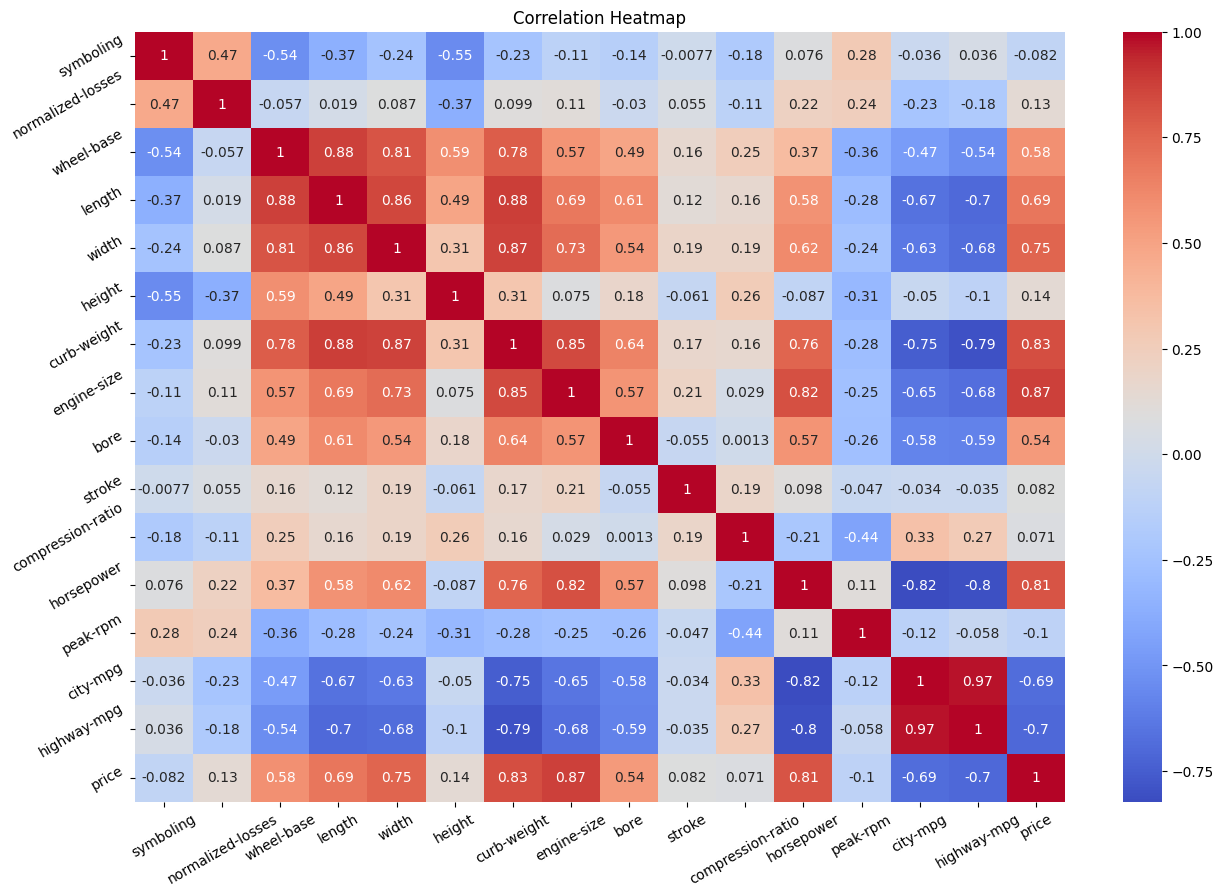

In [23]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=30)
plt.yticks(rotation=30)

# **Predictive Modeling**

In [24]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, root_mean_squared_error

In [25]:
# Apply label encoding
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [26]:
# Split
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Linear Regression model train and predict
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [28]:
# XGBoost train and predict
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

In [29]:
# R2 and Root mean square error for LR
print(r2_score(y_test, pred_lr))
print(root_mean_squared_error(y_test, pred_lr))

0.8525772530998172
3738.2411158259056


In [30]:
# R2 and Root mean square error for XGB
print('R2:', r2_score(y_test, pred_xgb))
print('RMSE:', root_mean_squared_error(y_test, pred_xgb))

R2: 0.9469881633504875
RMSE: 2241.6689992117595


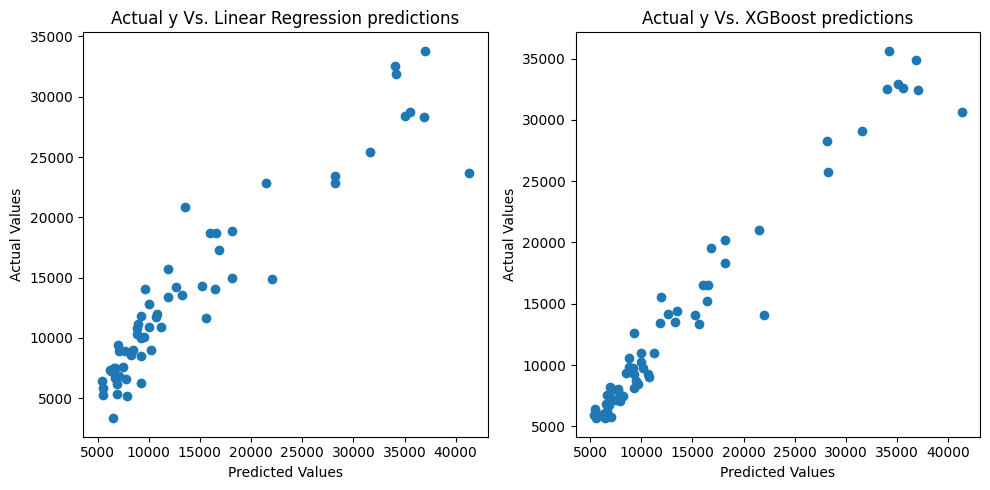

In [31]:
# Compareing actual target values (y_test) with predictions from two models:
# - Linear Regression (left subplot)
# - XGBoost Regressor (right subplot)

# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot actual vs. predicted values for the Linear Regression model in the first subplot
ax[0].scatter(y_test, pred_lr)
ax[0].set_title('Actual y Vs. Linear Regression predictions')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Actual Values')

# Plot actual vs. predicted values for the XGBoost model in the second subplot
ax[1].scatter(y_test, pred_xgb)
ax[1].set_title('Actual y Vs. XGBoost predictions')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Actual Values')

plt.tight_layout()